# Aula de Mercado Financeiro

## Preparação do Ambiente

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()


### Importando os dados

In [2]:
clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')

In [3]:
clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


## Análise dos Dados

In [4]:
clientes_cadastrados.shape

(438557, 18)

In [5]:
clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [6]:
clientes_cadastrados['ID_Cliente'].value_counts()

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [7]:
clientes_cadastrados.duplicated().sum()

0

In [8]:
#Verifificando se existem id's de clientes duplicados
clientes_cadastrados[clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [9]:
(94/438557) * 100

0.021433929911049192

Como a amostra de de ID's repetidos são pequenos, vamos eliminar os clientes duplicados.

In [10]:
id_repetidos = clientes_cadastrados[clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [11]:
df_clientes_cadastrados_unicos = clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_unicos


,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [12]:
df_clientes_cadastrados_unicos['ID_Cliente'].value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [13]:
df_clientes_cadastrados_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [14]:
df_clientes_cadastrados_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

### Analisando os Dados Quantitativos 

In [15]:
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

#### Anos empregados

In [16]:
df_clientes_cadastrados_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


Notamos que a coluna Anos_empregado possui valores que chegam à -1.000. Mesmo que esse campo medisse os anos também que o cliente está desempregado esse valor é inatingível.  
Vamos verificar melhor esses dados - primeiro verificar se esse valor está atrelado à alguma categoria de renda.

In [17]:
df_clientes_cadastrados_unicos.query('Anos_empregado <= 0 ')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Todos os 75.314 registros com -1.000 anos de anos empregados se tratam de pencionistas.  
Para facilitar, vamos substituir esse valor por -1.

In [18]:
df_clientes_cadastrados_unicos['Anos_empregado'].replace(-1000.7, -1, inplace=True)

In [19]:
df_clientes_cadastrados_unicos.query('Anos_empregado <= 0 ')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1.0            Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

#### Analisando Rendimento Anual

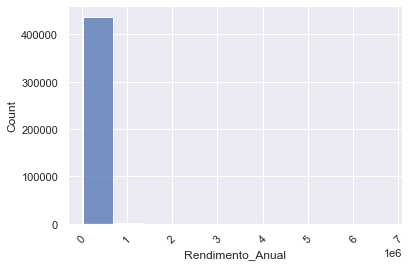

In [20]:
sns.histplot(data=df_clientes_cadastrados_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Observa-se que esse gráfico de rendimento anual está contaminado com os outliers, visto que só conseguimos vizualizar uma barra, com valores de até 1.000.000. Vamos eliminar verificar quantos registros temos nessa condição.

In [21]:
coluna = df_clientes_cadastrados_unicos['Rendimento_Anual']
coluna_media = coluna.mean()
coluna_std = coluna.std()

limite_superior = coluna_media + (2 * coluna_std)
limite_inferior = coluna_media - (2 * coluna_std)

index_outlier = []

for index, valor in coluna.items():
    if valor > limite_superior or valor < limite_inferior:
        index_outlier.append(index)


len(index_outlier)

12641

Novamente são poucos registros comparado à base, então vamos eliminar esses casos também.

In [22]:
df_clientes_sem_outliers = df_clientes_cadastrados_unicos.drop(index_outlier)
df_clientes_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


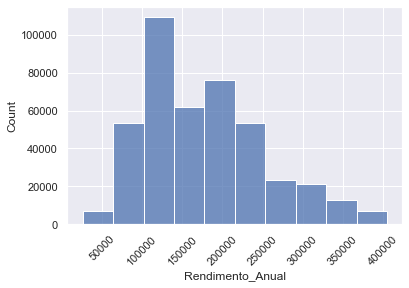

In [23]:
sns.histplot(data=df_clientes_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Agora conseguimos verificar melhor a distribuição de renda da nossa população. A distribuição parece estar assimétrica e inclinado para direita, o que indica que quanto maior o rendimento, menor a quantidade de pessoas.

#### Distribuição de Idade

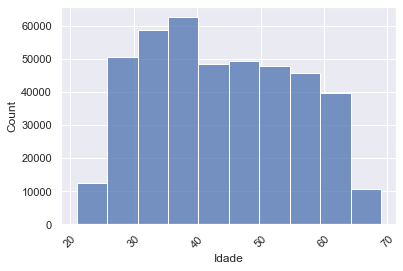

In [24]:
sns.histplot(data=df_clientes_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

#### Anos Empregado

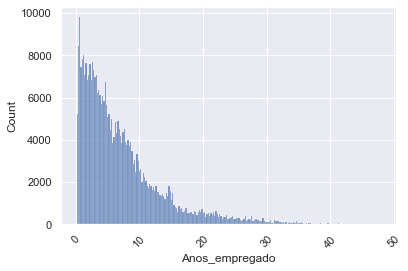

In [25]:
sns.histplot(data=df_clientes_sem_outliers.query('Anos_empregado > 0'), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

Como esperado, quando somente uma pequena parcela da população está empregado à bastante tempo.

### Analisando Dados Categóricos

In [26]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria',
                        'Categoria_de_renda', 'Grau_Escolaridade', 
                        'Estado_Civil', 'Moradia', 'Tem_Celular', 
                        'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                        'Ocupacao']

#### Estado Civil

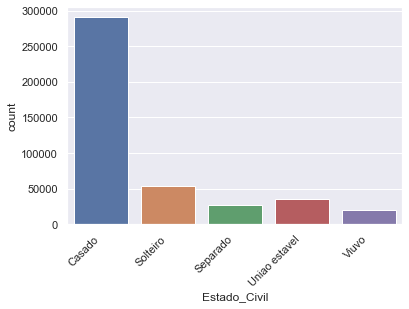

In [27]:
sns.countplot(data=df_clientes_sem_outliers, x='Estado_Civil')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Celular

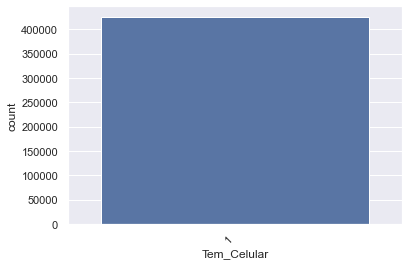

In [28]:
sns.countplot(data=df_clientes_sem_outliers, x='Tem_Celular')
plt.xticks(rotation=45, ha='right')
plt.show()

Vemos que no nosso dataset só existem clientes que possuel celular - logo essa informação não será útil para o nosso modelo futuramente.

#### Ocupação

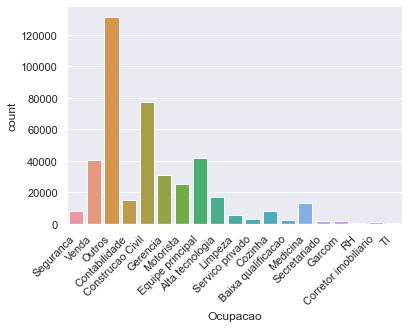

In [29]:
sns.countplot(data=df_clientes_sem_outliers, x='Ocupacao')
plt.xticks(rotation=45, ha='right')
plt.show()

Vemos uma quantidade relevante de pessoas que se encaixaram na categoria 'Outros', mas essa categoria é muito vaga, por isso vamos verificar se conseguimos de alguma forma essa categoria.

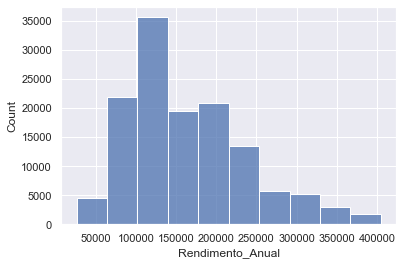

In [30]:
sns.histplot(data=df_clientes_sem_outliers.query('Ocupacao == "Outros"'), x='Rendimento_Anual', bins=10)
plt.show()

A distribuição de renda da categoria 'Outros' parece estar seguindo o mesmo padão da nossa população, portanto não dá para se distinguir as categorias.

### Tratamento de Dados I  
Como verificamos, a coluna Tem_Celular não será útil para nós já que só possui um único valor, e por isso ele será eliminado do nosso dataset.  
Adicionalmente vamos eliminar a coluna com os gêneros, para que o nosso modelo não seja viés preconceituoso.

In [31]:
df_clientes_cadastrados_tratamento1 = df_clientes_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [32]:
colunas_categoricas.remove('Genero')
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

### Analisando o Dataset Clientes Aprovados

In [33]:
clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [34]:
clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [35]:
#Verificando quantos clientes existem nesse dataset
clientes_aprovados['ID_Cliente'].value_counts().shape

(45985,)

In [36]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [37]:
clientes_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [38]:
clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


#### Avaliando as Faixas de Atraso

In [39]:
clientes_aprovados['Faixa_atraso'].value_counts().index.tolist()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

### Análise Vintage

No mercado financeiro existe um método para se avaliar o risco de crédito chamado análise Vintage, que consistem em avaliar o desempenho de uma carteira ou credor em diferentes períodos de tempo, sendo comumente mensal ou semestral.  
Para mais informação, segue link de [referência](https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html).  
As próximas manipulações serão deddicadas para podermos realizar essa análise.

In [40]:
df_registros_creditos_aprovados_ID = clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_aprovados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [41]:
clientes_aprovados = clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [42]:
ser_final = df_registros_creditos_aprovados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [43]:
clientes_aprovados = clientes_aprovados.merge(ser_final, on='ID_Cliente')
clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [44]:
clientes_aprovados['Janela'] = clientes_aprovados['Final'] - clientes_aprovados['Abertura']
clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29
1048571,5150487,-26,pagamento realizado,-29,0,29
1048572,5150487,-27,pagamento realizado,-29,0,29
1048573,5150487,-28,pagamento realizado,-29,0,29


MOB = Month On Book. Ele mensua quanto tempo o crédito está aberto.

In [45]:
clientes_aprovados['MOB'] = clientes_aprovados['Mes_referencia'] - clientes_aprovados['Abertura']
clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18
...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4
1048571,5150487,-26,pagamento realizado,-29,0,29,3
1048572,5150487,-27,pagamento realizado,-29,0,29,2
1048573,5150487,-28,pagamento realizado,-29,0,29,1


In [46]:
dict_faixa_atraso = {'nenhum empréstimo': 0, 'pagamento realizado': 1, '1-29 dias': 2,
                     '30-59 dias': 3, '60-89 dias': 4, '90-119 dias': 5, 
                     '120-149 dias': 6, '>150 dias': 7}

In [47]:
clientes_aprovados['Ind_faixa_atraso'] = clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso)
clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [48]:
clientes_aprovados['Mau'] = clientes_aprovados.apply(lambda x: 1 if x['Ind_faixa_atraso'] > 3 else 0, axis=1)
clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0
...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0


In [49]:
df_registros_creditos_ID = clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').\
                                                    apply(lambda x: x.iloc[0]).reset_index(drop=True)

df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [50]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_clientes']

In [51]:
df_denominador

,Abertura,Qtd_clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [52]:
df_vintage = clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'Qtd_clientes']

In [53]:
df_vintage

,Abertura,MOB,Qtd_clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [54]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on='Abertura', how='left')
df_vintage

,Abertura,MOB,Qtd_clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [55]:
df_vintage['Qtd_mau'] = np.nan

for j in range(-60, 1):
    ls = []
    for i in range(0, 61):
        due = list(clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_mau'] = len(set(ls))

df_vintage['Taxa_mau'] = df_vintage['Qtd_mau'] / df_vintage['Qtd_clientes']
df_vintage

,Abertura,MOB,Qtd_clientes,Qtd_mau,Taxa_mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [56]:
df_vintage_pivot = df_vintage.pivot(
    index = 'Abertura', 
    columns = 'MOB',
    values = 'Taxa_mau'
)

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### MOB x Abertura

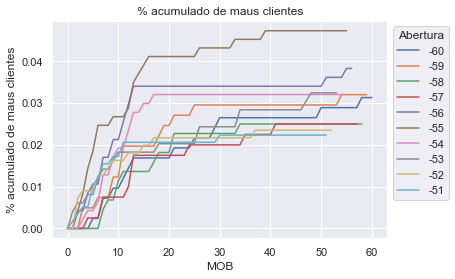

In [57]:
lst = [i for i in range(0, 61)]

df_vintage_pivot[lst].T.iloc[:, :10].plot(
    legend=True,
    title='% acumulado de maus clientes'

)

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus clientes')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()


No gráfico acima verificamos que, o acumulado de maus clientes tende a estabilizar mais ou menos aos 12 meses, independente de quando o crédito foi aberto.  

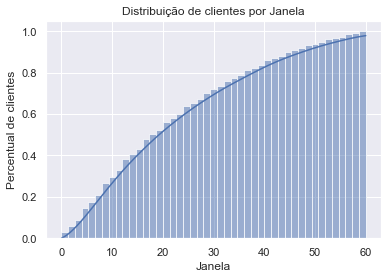

In [58]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por Janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')

plt.show()

In [59]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                         'maior_120_dias': 6, 'maior_150_dias': 7}

In [60]:
for chave, valor in dict_intervalo_atraso.items():
    clientes_aprovados[f'Mau_{chave}'] = clientes_aprovados.apply(lambda x: 1 if x['Ind_faixa_atraso'] >= valor else 0, axis=1)

clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [61]:
clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0,0,0,0,0,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0,0,0,0,0,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0,0,0,0,0,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0,0,0,0,0,0


In [62]:
dict_taxa_mau = {}
id_sum = len(set(clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
    df_min_mau = clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
    df_mob_taxa_mau = pd.DataFrame({'MOB': range(0, 61), 'Taxa_mau': np.nan})
    lst = []

    for i in range(0, 61):
        due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
        lst.extend(due)
        df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_mau'] = len(set(lst)) / id_sum
    
    dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


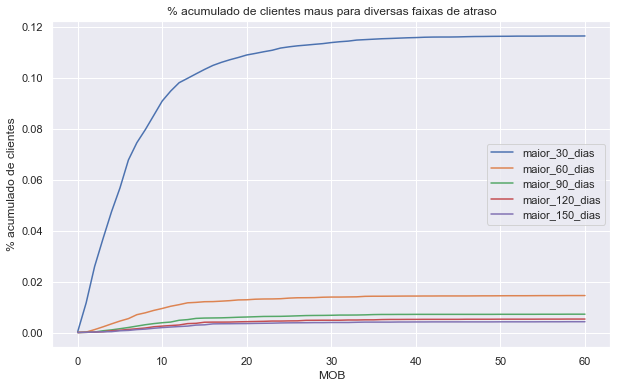

In [63]:
df_taxa_mau.plot(title='% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')

plt.show()

In [64]:
len(clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [65]:
df_clientes_aprovados_tratamento1 = clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

### Definindo Variável Target

Por fim, baseado na análise vintage que realizamos, vamos criar a variável target, isso é, determinar de um determinado cliente representa um mau risco de crédito ou não.  
Para o nosso caso, determinamos que clientes que atrasaram em mais de 59 dias representa um mau risco de crédito.

In [66]:
#Criando label 
def verifica(registros):
    lista_status = registros['Faixa_atraso'].to_list()
    if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
        return 1
    else:
        return 0

df_registros_creditos_ID = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_ID.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_ID.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [67]:
#Verificando quantos maus pagadores temos no dataset.
df_registros_creditos_ID['Mau'].sum()

585

In [68]:
df_registros_creditos_ID.shape

(30918, 2)

In [69]:
df_registros_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_ID, on='ID_Cliente')
df_registros_clientes_targets

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,5149729,1,1,0,90000.0,Empregado,Ensino medio,Casado,Casa propria,52.0,0,0,0,Outros,2.0,4.7,1
22738,5149775,1,1,0,130500.0,Empregado,Ensino medio,Casado,Casa propria,44.0,0,1,0,Construcao Civil,2.0,25.7,1
22739,5149834,0,1,0,157500.0,Associado comercial,Ensino superior,Casado,Casa propria,34.0,0,1,1,Medicina,2.0,3.6,1
22740,5149838,0,1,0,157500.0,Pensionista,Ensino superior,Casado,Casa propria,34.0,0,1,1,Medicina,2.0,3.6,1


In [70]:
df_registros_clientes_targets['Mau'].value_counts(normalize=True) * 100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

Portanto temos um dataset onde 97,72% dos clientes são bons pagadores e apenas 2,28% são mau pagadores.  
Essa proporção tera um grande impacto no treinamento do modelo, como veremos adiante.

## Criando o Modelo
Feito todo o tratamento da base de dados, vamos partir para criar o nosso modelo.  
Antes, reordenar a base de dados de forma que as colunas fiquem organizadas da seguinte forma: ID, colunas quantitativas, binárias e categóricas não binárias.

In [71]:
colunas_categoricas_binarias = ['Tem_Carro', 'Tem_Casa_Propria', 'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email']
colunas_categoricas_nao_binarias = ['Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia', 'Ocupacao']

In [72]:
df_registros_clientes_targets = df_registros_clientes_targets[['ID_Cliente'] + 
            colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registros_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


### Importando as Bibliotecas  

In [73]:
import six
import sys

sys.modules['sklearn.externals.six'] = six

In [74]:
#Separação de Dados
from sklearn.model_selection import train_test_split

#Pré processamento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin 

#Balanceamento de dados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Pipeline
# from sklearn.pipeline import Pipeline #Sera que precisa desse?
from imblearn.pipeline import Pipeline


#Modelos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

#Métricas de avaliação
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix
from scipy import stats

#Tunagem de hiperparametros
from sklearn.model_selection import GridSearchCV



### Função para Rodar o Modelo  
Para facilitar essa etapam vamos criar uma função para criar, testar e avaliar o nosso modelo:

In [75]:
#Definindo semente aleatória
SEED = 1561651

def roda_modelo(modelo, dados):

    X = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)
    
    modelo.fit(X_train, y_train)

    # Calculando a probabilidade das classes
    # e posteriormente o AUC
    prob_predict = modelo.predict_proba(X_test)
    auc = roc_auc_score(y_test, prob_predict[:, 1])
    print(f'AUC {auc}')

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(X_test))[:, 1]
    data_mau = np.sort(modelo.predict_proba(X_test))[:, 0]
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f'KS {kstest}')

    # Criando Matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)
    plt.show(matriz_confusao)

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print('\nClassification Report')
    print(classification_report(y_test, predicao, zero_division=0))



Agora precisamos criar o transformador para encapsular a etapa da conversão dos nossos dados: para as colunas categóricas serão aplicadas o one hot encoder e transformar a coluna em binário, e as colunas quantitativas aplicar a padronização de escala através do MinMaxScaler.  
Essas duas etapas estarão junto da nossa classe Transformador, que posteriormente será passado para o nosso pipeline aplicar as mudanças.

In [76]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__(self, colunas_quantitativas, colunas_categoricas):
        self.colunas_quantitativas = colunas_quantitativas
        self.colunas_categoricas = colunas_categoricas
        self.one = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None):
        self.one.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_quantitativas])

        return self

    def transform(self, X, y = None):
        X_categoricas = pd.DataFrame(data=self.one.transform(X[self.colunas_categoricas]).toarray(),
                                                                columns=self.one.get_feature_names_out(self.colunas_categoricas))


        X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_quantitativas]),
                                                                columns=self.colunas_quantitativas)

        X = pd.concat([X_categoricas, X_continuas], axis=1)

        return X


O pipeline é uma forma de encapsular e organizar as etapas da criação de um modelo, de maneira que o código fica mais legível.  
A princpipio instanciamos o pipeline com duas etapas - o transformador que criamos acima e o modelo.  
Para criar um baseline, vamos rodar um dummy classifier:

AUC 0.5
KS KstestResult(statistic=1.0, pvalue=0.0)


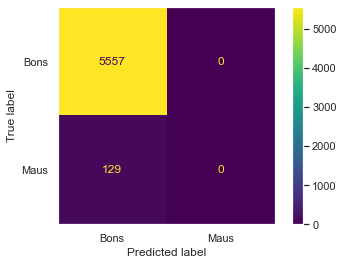


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [77]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Modelo', DummyClassifier(strategy='prior'))
])

roda_modelo(pipeline, df_registros_clientes_targets)

Como esperado do modelo dummuy, ele simplesmente "chutou" que todos os clientes são bons pagadores e dessa forma tivemos uma boa precisão, mas um mau recall.  
Em seguida vamos tentar uma regressão logística.

AUC 0.5847237857691885
KS KstestResult(statistic=1.0, pvalue=0.0)


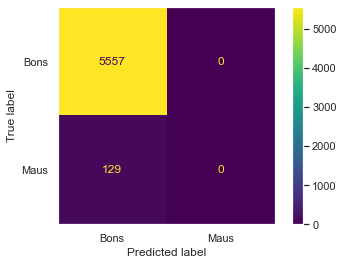


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [78]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))
])

roda_modelo(pipeline, df_registros_clientes_targets)

Um resultado ligeiramente melhor, se olharmos o auc, mas ainda continua predizendo que todos os clientes são bons pagadores.  
Isso acontece demos para o nosso modelo um dataset altamente desbalanceado e por isso tem dificuldade de identificar a classe minoritária (mau pagador).   
Para tentar contornar esse problema, vamos experimentar as técnicas de oversampling e undersampling.  
[Artigo de referencia](https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b#:~:text=1.2-Oversampling%20Ao%20contr%C3%A1rio%20do%20Undersampling%2C%20o%20Oversampling%20consiste,c%C3%B3pias%20de%20dados%20j%C3%A1%20existentes%20na%20classe%20minorit%C3%A1ria.)

### Oversampling  
Essa técnica consiste em criar artificialmente mais dados da classe minoritária, afim de balancear a proporção entre elas.  
Dentre os vários métodos que podemos encontrar, vamos utilizar SMOTE da biblioteca imbalance learn.   
**Importante**: Essa manipulação afete somente os dados de teste.

AUC 0.5813102546826197
KS KstestResult(statistic=1.0, pvalue=0.0)


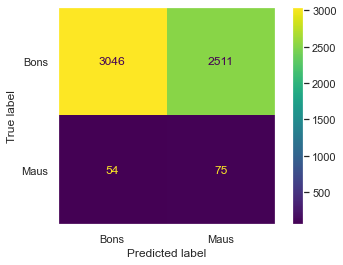


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [79]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED)),
    ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))
])

roda_modelo(pipeline, df_registros_clientes_targets)

O auc teve uma ligeira queda, mas o modelo já é capaz de separar melhor as classes.  
Agora vamos testar um outro modelo, o random forest. Vamos testar tanto sem oversampling como com ele, para avaliarmos a melhora no desempenho.

AUC 0.821528263116706
KS KstestResult(statistic=1.0, pvalue=0.0)


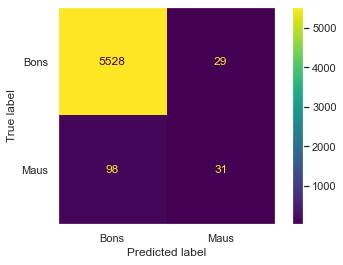


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [80]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Modelo', RandomForestClassifier(random_state=SEED))
])

roda_modelo(pipeline, df_registros_clientes_targets)

AUC 0.8343949177864918
KS KstestResult(statistic=0.9998241294407316, pvalue=0.0)


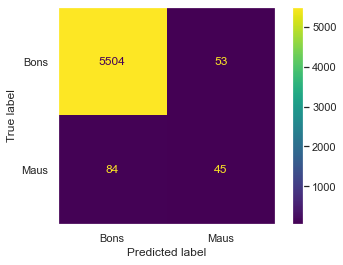


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.46      0.35      0.40       129

    accuracy                           0.98      5686
   macro avg       0.72      0.67      0.69      5686
weighted avg       0.97      0.98      0.97      5686



In [81]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED, )),
    ('Modelo', RandomForestClassifier(random_state=SEED))
])

roda_modelo(pipeline, df_registros_clientes_targets)

Podemos ver que mesmo sem o oversampling o resultado da random forest foi melhor do que a regressão logística.

### Undersampling
O undersampling, ao contrário do oversampling, reduz a quantidade da classe majoritária afim de balancear os dados.  
Vamos verificar se o nosso modelo pode se sair melhor com essa abordagem.  
Para esse teste, vamos utilizar a RandomUnderSampler:

AUC 0.7558418532111884
KS KstestResult(statistic=0.9848751319029194, pvalue=0.0)


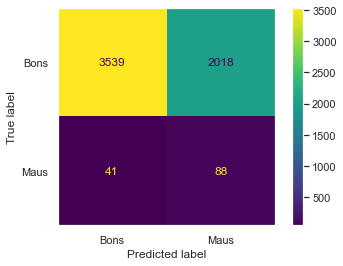


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.64      0.77      5557
           1       0.04      0.68      0.08       129

    accuracy                           0.64      5686
   macro avg       0.52      0.66      0.43      5686
weighted avg       0.97      0.64      0.76      5686



In [82]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', RandomUnderSampler(random_state=SEED)),
    ('Modelo', RandomForestClassifier(random_state=SEED))
])

roda_modelo(pipeline, df_registros_clientes_targets)

O modelo não apresentou melhora em comparação com o oversampling, por isso vamos descartar essa abordagem.

### Testando outros modelos  
Definida a abordagem, vamos testar outro algorítimo: a Extreme Gradiente Boosting, a XGB:

AUC 0.7593816305435006
KS KstestResult(statistic=1.0, pvalue=0.0)


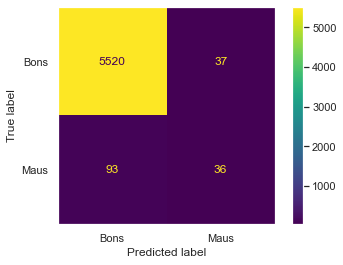


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.49      0.28      0.36       129

    accuracy                           0.98      5686
   macro avg       0.74      0.64      0.67      5686
weighted avg       0.97      0.98      0.97      5686



In [83]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED, )),
    ('Modelo', XGBClassifier(random_state=SEED, verbosity=0))
])

roda_modelo(pipeline, df_registros_clientes_targets)

O XGBoost apresentou um AUC menor, mas conseguiu diminuir as previsões erradas.  
Mas vamos levar os modelos de random foreste e xgb para o processo de tunagem e a partir daí determinar o melhor modelo.


### Tunando Hiperparametros  
Para escolher a melhor configuração de hiperparametros no modelo, vamos modificar a nossa função `roda_modelo` e adicionar o gridsearch que, ao receber um conjunto de hiperparametros testará todas as combinações para achar o melhor.  

In [84]:
SEED = 1561651

def roda_modelo(parametros, modelo, dados):

    X = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)


    grid = GridSearchCV(estimator=modelo, param_grid=parametros, scoring='roc_auc')
    grid.fit(X_train, y_train)
    
    # Calculando a probabilidade e calulando o AUC
    prob_predict = grid.predict_proba(X_test)
    auc = roc_auc_score(y_test, prob_predict[:, 1])
    print(f'AUC {auc}')

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(grid.predict_proba(X_test))[:, 1]
    data_mau = np.sort(grid.predict_proba(X_test))[:, 0]
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f'KS {kstest}')

    # Criando Matriz de confusão
    matriz_confusao = plot_confusion_matrix(grid, X_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)
    plt.show(matriz_confusao)   

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = grid.predict(X_test)
    print('\nClassification Report')
    print(classification_report(y_test, predicao, zero_division=0))
    print('Melhores parâmetros', grid.best_params_)



AUC 0.7975038117996298
KS KstestResult(statistic=1.0, pvalue=0.0)


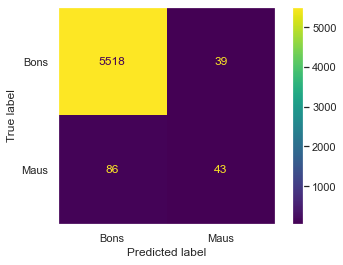


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.33      0.41       129

    accuracy                           0.98      5686
   macro avg       0.75      0.66      0.70      5686
weighted avg       0.97      0.98      0.98      5686

Melhores parâmetros {'Modelo__Eta': 0.2, 'Modelo__max_depth': 10, 'Modelo__max_leaves': 2}


In [85]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED, )),
    ('Modelo', XGBClassifier(random_state=SEED, verbosity=0))
])

hiperparametro_xgboost = {
    'Modelo__max_depth': [2, 4, 6, 8, 10, 12],
    'Modelo__max_leaves': [2, 4, 6],
    'Modelo__Eta': [0.2, 0.25, 0.3, 0.45]
}

roda_modelo(hiperparametro_xgboost, pipeline, df_registros_clientes_targets)

AUC 0.840827198881779
KS KstestResult(statistic=1.0, pvalue=0.0)


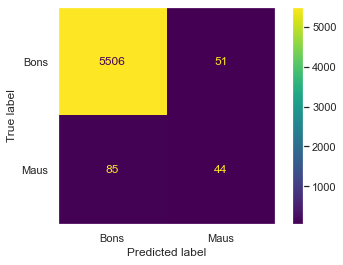


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.46      0.34      0.39       129

    accuracy                           0.98      5686
   macro avg       0.72      0.67      0.69      5686
weighted avg       0.97      0.98      0.97      5686

Melhores parâmetros {'Modelo__criterion': 'entropy', 'Modelo__min_samples_leaf': 1, 'Modelo__n_estimators': 300, 'Modelo__random_state': 1561651}


In [86]:
pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED, )),
    ('Modelo', RandomForestClassifier(random_state=SEED, verbose=0))
])

hiperparametro_random_forest = {
    'Modelo__n_estimators': [100, 200, 250, 300],
    'Modelo__criterion': ('gini', 'entropy'),
    'Modelo__min_samples_leaf': [1, 3, 5, 10],
    'Modelo__random_state': [SEED]

}

roda_modelo(hiperparametro_random_forest, pipeline, df_registros_clientes_targets)

Após a tunagem, o random forest se mostrou o melhor modelo e por isso vamo seguir com ele.

## Exportando o modelo
Agora que produzimos o melhor modelo, podemos passar para ele todo o dataset para treinamento e exportá-lo utilizando o joblib.

In [87]:
best_parameters = {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': SEED, 'verbose': 0}

pipeline = Pipeline([
    ('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
    ('Sampling', SMOTE(random_state=SEED, )),
    ('Modelo', RandomForestClassifier(**best_parameters))
])

In [88]:
X = df_registros_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registros_clientes_targets['Mau']

In [89]:
pipeline.fit(X, y)


Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_quantitativas=['Idade', 'Qtd_Filhos',
                                                      'Rendimento_Anual',
                                                      'Anos_empregado',
                                                      'Tamanho_Familia'])),
                ('Sampling', SMOTE(random_state=1561651)),
                (

In [90]:
from joblib import dump

In [91]:
dump(pipeline, '../objetos/modelo.joblib')

['../objetos/modelo.joblib']

Além do modelo, vamos exportar as features utilizadas no desenvolvimento do modelo, bem como as opções das colunas categóricas, para facilitar no desenvolvimento do input no streamlit.

In [92]:
features = X.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [93]:
dump(features, '../objetos/features.joblib')

['../objetos/features.joblib']

In [94]:
lista_campos = df_registros_clientes_targets[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(), axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [95]:
dump(lista_campos, '../objetos/lista_campos.joblib')

['../objetos/lista_campos.joblib']